<a href="https://colab.research.google.com/github/sreelekaa/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [3]:
# Reduce to 2D for visualization
X = X[:, :2]  # Only take first two features

In [4]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.svm import SVC

In [7]:
# Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [8]:
# RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

SVC(C=1)

In [9]:
import matplotlib.pyplot as plt
import numpy as np


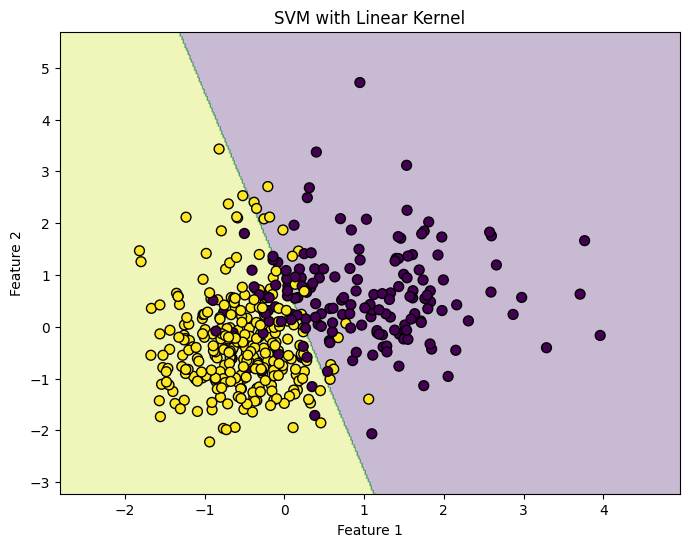

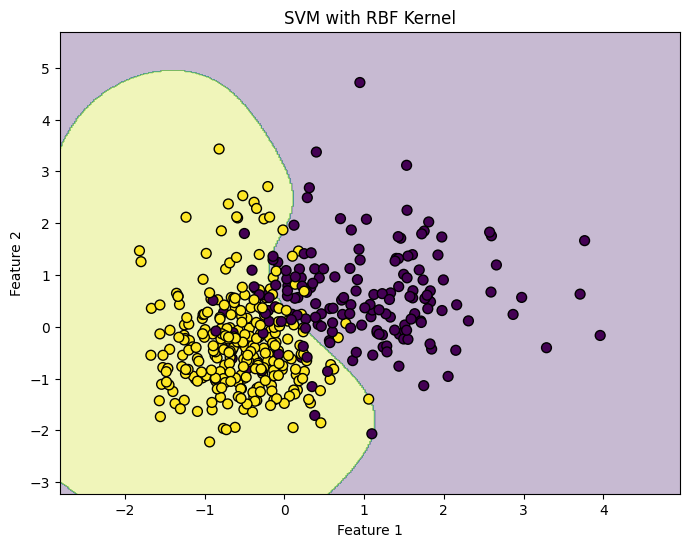

In [10]:
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=50)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(svm_linear, X_train, y_train, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_train, y_train, "SVM with RBF Kernel")

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1, 10]
}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 10, 'gamma': 0.1}


In [12]:
from sklearn.model_selection import cross_val_score

best_model = grid.best_estimator_
scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-Validation Accuracy: %.2f%%" % (scores.mean() * 100))


Cross-Validation Accuracy: 88.75%
